<a href="https://colab.research.google.com/github/kapibara3chi/ReinforcementLearning/blob/main/ReinfoecementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple Sample

## pip

In [1]:
!pip install gym-anytrading
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.9 MB/s eta 0:00:00


## code

[*********************100%%**********************]  1 of 1 completed


               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2023-01-04  21395.0  21650.0  20975.0  21150.0  20984.277344   8868500
2023-01-05  21650.0  22060.0  21330.0  21655.0  21485.320312  10631000
2023-01-06  21310.0  22120.0  21150.0  22030.0  21857.380859   9423800
2023-01-10  22970.0  23140.0  22450.0  23010.0  22829.703125   8432200
2023-01-11  23415.0  24015.0  23300.0  23950.0  23762.337891   8064900
Info: {'total_reward': 16400.0, 'total_profit': 0.5656829700615645, 'position': <Positions.Short: 0>}
trades:[{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 1085.0, 'total_profit': 1.0273025894445542, 'position': <Positions.Short: 0>}, {'total_reward': 1085.0, 'total_profit': 1.0273025894445542, 'posi

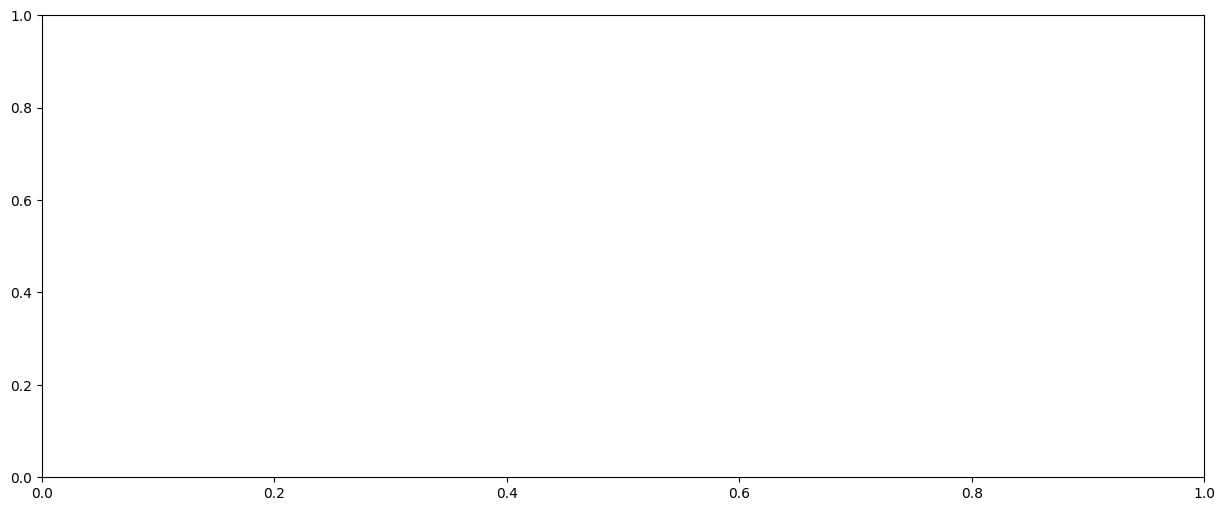

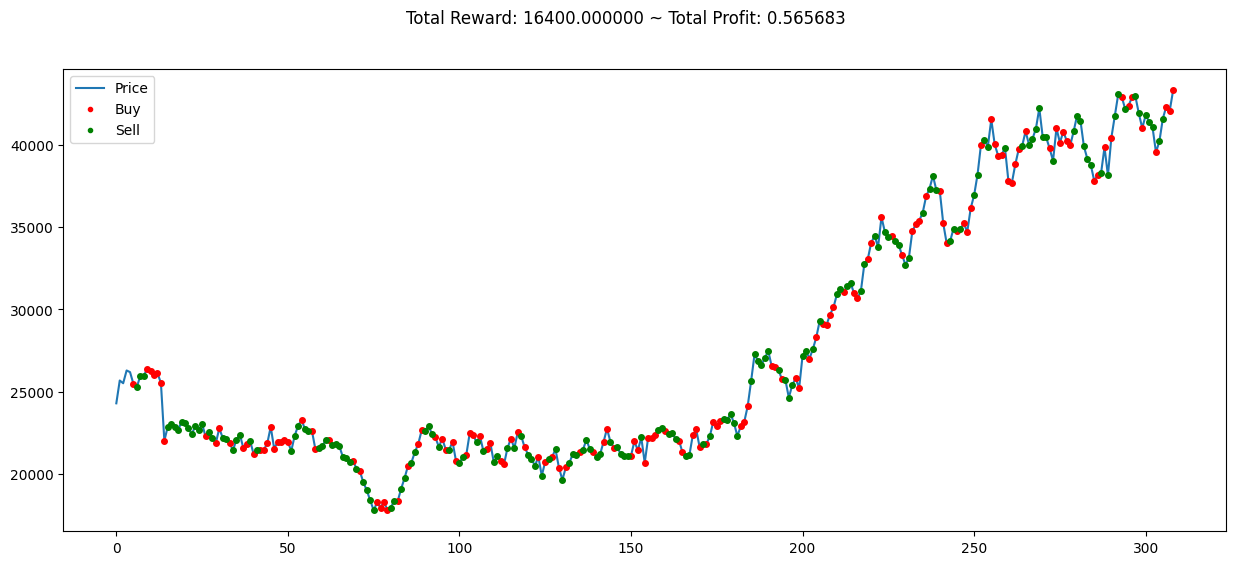

In [65]:
%matplotlib inline
import gym
import gym_anytrading
import gymnasium as gym
from gym_anytrading.envs import StocksEnv

import matplotlib.pyplot as plt

class CustomStocksEnv(StocksEnv):
    def render_all(self):
        # 凡例とマーカーサイズの調整を含むプロットを作成
        plt.figure(figsize=(15, 6))
        super().render_all()
        plt.legend(['Price', 'Buy', 'Sell'], markerscale=0.5)  # 凡例を追加
        plt.setp(plt.gca().get_lines(), markersize=4)  # マーカーサイズを調整


# 他にもデータ処理や可視化のために必要なライブラリをインポートします
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime

# CSVファイルから株価データを読み込みます
df = yf.download("6920.T",start='2023-01-01',end = datetime.now(),interval="1d")
print(df.head())

# `gym-anytrading`に必要なカラム名に変更します
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Forex環境を構築しますが、株価予測にも同様に適用できます
env = CustomStocksEnv(df=df, frame_bound=(10, len(df)), window_size=5)
# env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)


state = env.reset()
# 取引情報を格納するリストを初期化
trades = []

while True:
    action = env.action_space.sample()  # ランダムな行動を選択
    next_state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        print("Info:", info)
        break
    if 'total_reward' in info:
      trades.append(info)

print(f"trades:{trades}")
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()



# PPO

## pip

In [ ]:
!pip install gym-anytrading
!pip install yfinance
# !pip install 'stable-baselines3[extra]'
!pip install stable-baselines3

## code

In [20]:
import gym
import gym_anytrading
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
import yfinance as yf

# 株価データの取得
# df = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
df = yf.download("6920.T",start='2023-01-01',end = datetime.now(),interval="1d")

# 環境の作成
# env = gym.make('stocks-v0', df=df, frame_bound=(50, 100), window_size=10)
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)
env = DummyVecEnv([lambda: env])  # ベクトル化された環境の作成

# PPOモデルの作成
model = PPO("MlpPolicy", env, verbose=1)

# 学習の実行
model.learn(total_timesteps=20000)

# 学習したモデルを使用して予測
env = gym.make('stocks-v0', df=df, frame_bound=(100, 150), window_size=10)
obs,info = env.reset()
while True:
    # action, _states = model.predict(obs)
    action, _states = model.predict(obs, deterministic=True)
    next_state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        print("info:", info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()


[*********************100%%**********************]  1 of 1 completed


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1093 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 690         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013439191 |
|    clip_fraction        | 0.00532     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.688      |
|    explained_variance   | -1.79e-06   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.16e+06    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00245    |
|    value_loss           | 2.07e+06    |
-----------------------------------------
-----------------

ValueError: Error: Unexpected observation shape (10, 2) for Box environment, please use (5, 2) or (n_env, 5, 2) for the observation shape.

In [22]:
import gym
import gym_anytrading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt


import gymnasium as gym
from stable_baselines3.common.env_util import make_vec_env


# 株価データの取得
df = yf.download("6920.T", start='2023-01-01', end=datetime.now(), interval="1d")

# 環境の作成
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)
env = DummyVecEnv([lambda: env])  # ベクトル化された環境の作成

# PPOモデルの作成
model = PPO("MlpPolicy", env, verbose=1)

# 学習の実行
model.learn(total_timesteps=20000)

# 学習したモデルを使用して予測
env = gym.make('stocks-v0', df=df, frame_bound=(100, 150), window_size=10)
env = DummyVecEnv([lambda: env])  # ベクトル化された環境を再作成
obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        print("info:", info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()


[*********************100%%**********************]  1 of 1 completed


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1105 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 817           |
|    iterations           | 2             |
|    time_elapsed         | 5             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00036774372 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.693        |
|    explained_variance   | -2.75e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.3e+06       |
|    n_updates            | 10            |
|    policy_gradient_loss | -1.09e-05     |
|    value_loss           | 2.42e+06      |
-------------------------

ValueError: Error: Unexpected observation shape (1, 10, 2) for Box environment, please use (5, 2) or (n_env, 5, 2) for the observation shape.

### work

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%%**********************]  1 of 1 completed


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1093 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 614        |
|    iterations           | 2          |
|    time_elapsed         | 6          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01608358 |
|    clip_fraction        | 0.0645     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.681     |
|    explained_variance   | -0.00249   |
|    learning_rate        | 0.0003     |
|    loss                 | 20.4       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0022    |
|    value_loss           | 27.4       |
----------------------------------------
-----------------------------------

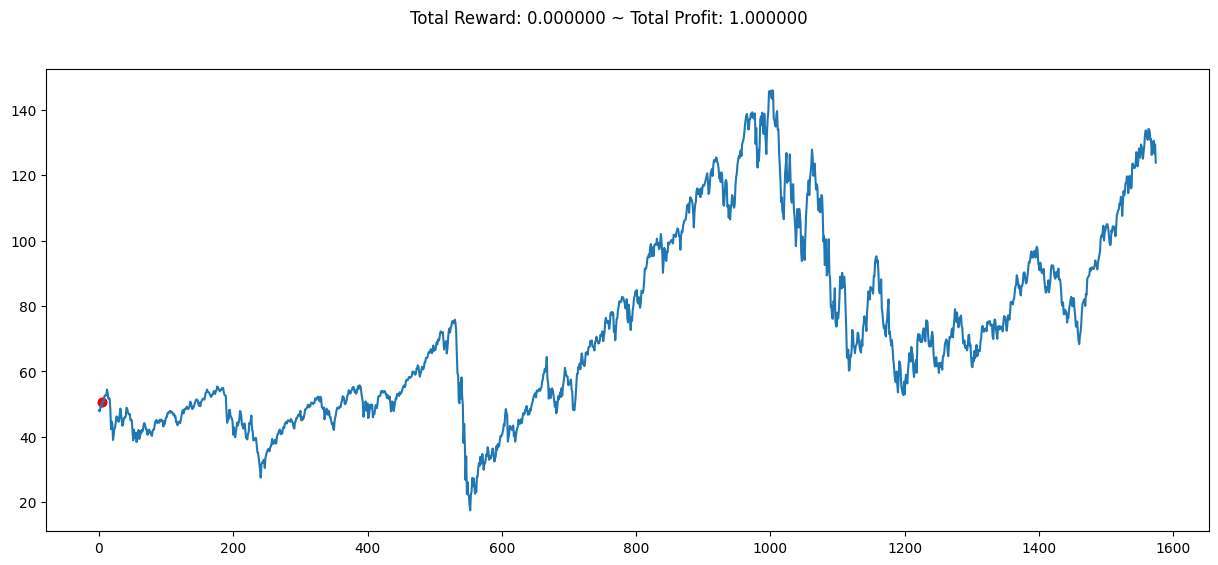

In [69]:
# import gym_anytrading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
# gymnasiumをインポート（gymの代わりに）
import gymnasium as gym

# 株価データの取得
df = yf.download("SPXL", start='2018-01-01', end=datetime.now(), interval="1d")

# TradingEnv環境の作成
# 環境の作成

# PPOモデルの作成
model = PPO("MlpPolicy", env, verbose=1)

# 学習の実行
model.learn(total_timesteps=20000)
# 学習したモデルを使用して予測
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)
env = DummyVecEnv([lambda: env])  # ベクトル化された環境の作成
obs = env.reset()
trades=[]
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, done, info = env.step(action)  # 'terminated' と 'truncated' を 'done' に置き換える
    # print(f'obs{obs}')
    # print(f'rewards{rewards}')
    # print(f'done{done}')
    # print(f'info{info}')
    if done:  # 'terminated or truncated' を 'done' に置き換える
        print("info:", info)
        break
    if 'total_reward' in info:
      trades.append(info)
      print("add")

print(f'*****trade:')
for i in trades:
  print(i)

plt.figure(figsize=(15, 6))
plt.cla()
# 各環境の render メソッドを呼び出す
for i in range(len(env.envs)):
    plt.subplot(1, len(env.envs), i+1)
    env.envs[i].render()
plt.show()
